
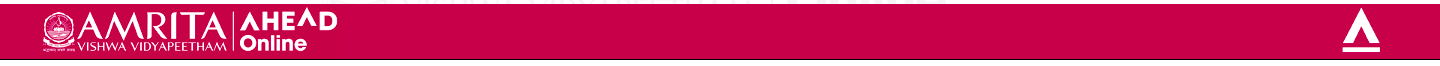

In [28]:
import nltk
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer

lm = WordNetLemmatizer()
pm = PorterStemmer()

In [29]:
df_bbc = pd.read_csv('bbc-text.csv')
df_bbc

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [12]:
categories = df_bbc['category'].unique()
categories

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [13]:
cleaned_texts = []
cleaned_texts_lemma = []
cleaned_texts_stem = []
def pre_processing(df):
    data = np.asarray(df)
    no_cluster = len(categories)

    temp_text = []
    temp_text_lemma = []
    temp_text_stem = []

    for i in range(len(data)):
        temp_text.append([])
        temp_text_lemma.append([])
        temp_text_stem.append([])
        temp_text[i] = re.sub('[^a-zA-Z]', ' ', data[i][1] )  # Remove all punctuations
        temp_text[i] = temp_text[i].lower()
        temp_text[i] = temp_text[i].split()
        temp_text_lemma[i] = [lm.lemmatize(word) for word in temp_text[i] if not word in set(stopwords.words('english')) ] # First stemming method 
        temp_text_stem[i] = [pm.stem(word) for word in temp_text[i] if not word in set(stopwords.words('english'))] # Second stemming method
        temp_text[i] = [word for word in temp_text[i] if not word in set(stopwords.words('english')) ]  # we didn't use stemming method, just get rid of stopwords
        cleaned_texts.append(temp_text[i])
        cleaned_texts_lemma.append(temp_text_lemma[i])
        cleaned_texts_stem.append(temp_text_stem[i]) 

In [14]:
pre_processing(df_bbc)

In [31]:
ctg = df_bbc['category'].astype('category').cat.codes
df_bbc['category_id'] = ctg

In [32]:
cln_txt = []
for ct in cleaned_texts:
    cln_txt.append(" ".join(ct))

In [33]:
df_bbc['clean_text'] = cln_txt
df_bbc

,category,text,category_id,clean_text
0,tech,tv future in the hands of viewers with home th...,4,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,0,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,3,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,3,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1,ocean twelve raids box office ocean twelve cri...
...,...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,0,cars pull us retail figures us retail sales fe...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,2,kilroy unveils immigration policy ex chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,1,rem announce new glasgow concert us band rem a...
2223,politics,how political squabbles snowball it s become c...,2,political squabbles snowball become commonplac...


In [34]:
df_bbc.to_csv("bbc_preprocessed.csv")

#Load Dataset

In [35]:
df = pd.read_csv('bbc_preprocessed.csv')
df.head()

,Unnamed: 0,category,text,category_id,clean_text
0,0,tech,tv future in the hands of viewers with home th...,4,tv future hands viewers home theatre systems p...
1,1,business,worldcom boss left books alone former worldc...,0,worldcom boss left books alone former worldcom...
2,2,sport,tigers wary of farrell gamble leicester say ...,3,tigers wary farrell gamble leicester say rushe...
3,3,sport,yeading face newcastle in fa cup premiership s...,3,yeading face newcastle fa cup premiership side...
4,4,entertainment,ocean s twelve raids box office ocean s twelve...,1,ocean twelve raids box office ocean twelve cri...


#Vectorize

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['clean_text']

tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(texts) #features
print(X.shape)

(2225, 27739)


#Choosing best/optimal 'k' using elbow method

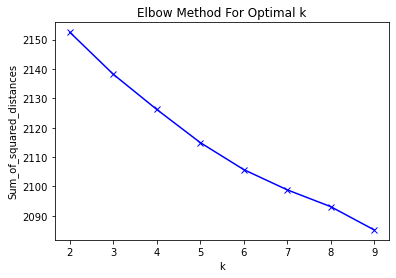

Wall time: 48.6 s


In [37]:
%%time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

#Apply clustering based on 'k'

In [38]:
from sklearn.cluster import KMeans
k = 5
model = KMeans(n_clusters=k)
model.fit(X)

KMeans(n_clusters=5)

In [39]:
labels=model.labels_
labels

array([1, 2, 0, ..., 4, 2, 0])

Compare with existing label column

In [40]:
data=pd.DataFrame(list(zip(df.category,labels)),columns=['labels','cluster'])

pd.set_option("display.max_rows", None)
data.sort_values('cluster')
data.sample(20)

,labels,cluster
2093,entertainment,4
1551,tech,1
460,business,2
1784,sport,0
1061,entertainment,4
1983,sport,0
1751,entertainment,4
1179,business,2
1555,business,2
1298,entertainment,4


In [41]:
data.head(25)

,labels,cluster
0,tech,1
1,business,2
2,sport,0
3,sport,0
4,entertainment,4
5,politics,3
6,politics,3
7,sport,0
8,sport,0
9,entertainment,4


Natural Language Processing - Lab Manual
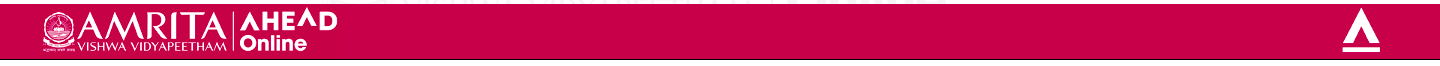